# UT3 - Práctica 7

## Ejercicio 1

Antes de empezar a trabajar, tendrás que importar las librerías de NumPy y Matplotlib.Pyplot para poder trabajar con ellas:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Code used to get sample images
# pip install scikit-image
# pip install -U scikit-image[optional]
from skimage import data

camera = data.camera()
coins = data.coins()
coffee = data.coffee() # color
plt.imsave("images/camera.png", data.camera(), cmap="gray")
plt.imsave("images/coins.png", data.coins(), cmap="gray")
plt.imsave("images/coffe.png", data.coffee())

---
## Ejercicio 2

Haz una función que, recibiendo una imagen en escala de grises (2D) como parámetro y una máscara de tamaño 3x3, devuelva la imagen tras aplicar la máscara a cada píxel (guardando como nuevo valor del píxel la suma de todos los valores resultantes) a excepción de los bordes:

In [4]:
def apply_mask(image, mask):
    # Check mask size
    if mask.shape[0] != 3 or mask.shape[1] !=3:
        print("Máscara no permitida")
        return None
    
    result = np.copy(image)
    for row in range(1, image.shape[0] - 1):
        for col in range(1, image.shape[1] - 1):
            result[row,col] = (image[row-1:row+2, col-1:col+2] * mask).sum()
    return result

---
## Ejercicio 3

Haz una función que, recibiendo una imagen en escala de grises (2D) como parámetro y un umbral, devuelva la imagen segmentada en base al umbral definido. Todo lo que esté por encima de dicho umbral deberá dar como resultado un valor de 1 en la imagen. Lo que esté por debajo tendrá un valor de 0:

In [31]:
def apply_threshold(image, threshold):
    return image >= threshold

---
## Ejercicio 4

Haz una función que, recibiendo como parámetro una imágen, una máscara y un umbral, primero aplique la máscara a la imagen, después la umbralice y por último devuelva la imagen resultante:

In [32]:
def border_detection(image, mask, threshold):
    masked = apply_mask(image, mask)
    return apply_threshold(masked, threshold)

---
## Ejercicio 5

Haz distintas pruebas con cada una de las imágenes de la práctica. Entre ellas, probando con distintos umbrales, prueba a utilizar este tipo de máscaras:
* [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
* [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
* [[-1,2,-1],[-1,2,-1],[-1,2,-1]]
* [[2,-1,-1],[-1,2,-1],[-1,-1,2]]
* [[-1,-1,2],[-1,2,-1],[2,-1,-1]]
* [[-1,-1,-1],[0,0,0],[1,1,1]]
* [[-1,0,1],[-1,0,1],[-1,0,1]]
* [[-1,-2,-1],[0,0,0],[1,2,1]]
* [[-1,0,1],[-2,0,2],[-1,0,1]]

In [66]:
# Used to transform color images to gray ones
def color2gray(image, r = 0.2989, g = 0.5870, b = 0.1140):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    grey_image = r * red + g * green + b * blue
    return grey_image

# Import and transform to grayscale
camera = color2gray(plt.imread("images/camera.png"))
coffe = color2gray(plt.imread("images/coffe.png"))
coins = color2gray(plt.imread("images/coins.png"))
spn_lenna = color2gray(plt.imread("images/spn_lenna.png"))
spn_lenna_clean = color2gray(plt.imread("images/clean_lenna_grayscale_3.png"))

# Create masks
mask_1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
mask_2 = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
mask_3 = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
mask_4 = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
mask_5 = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

mask_6 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
mask_7 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
mask_8 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
mask_9 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
masks = [mask_1, mask_2, mask_3, mask_4, mask_5, mask_6, mask_7, mask_8, mask_9]

# Default threshold
threshold = 0.5

# I create a function to avoid code replication
def apply_masks_and_show(image, masks, threshold):
    plt.imshow(image, cmap="gray")
    plt.show()
    for mask in masks:
        result = border_detection(image, mask, threshold)
        plt.imshow(result, cmap="gray")
        plt.show()

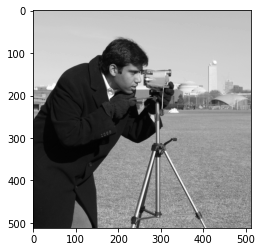

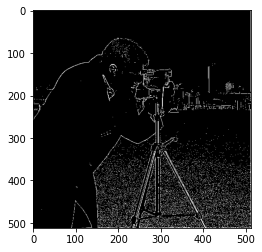

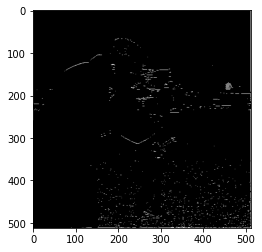

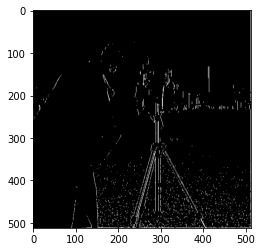

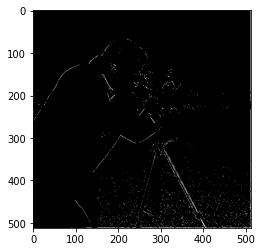

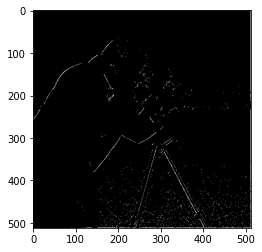

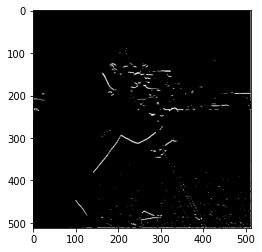

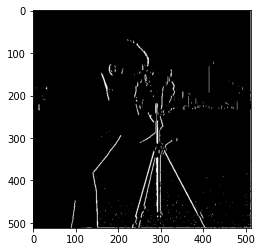

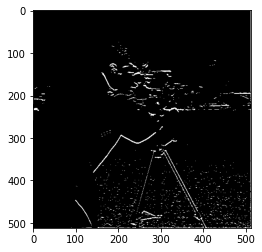

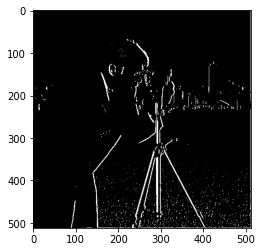

In [51]:
apply_masks_and_show(camera, masks, threshold)

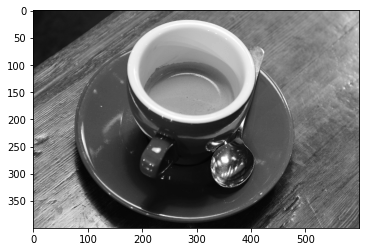

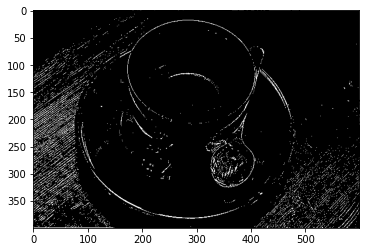

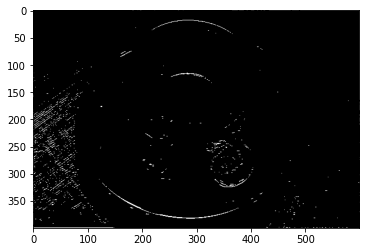

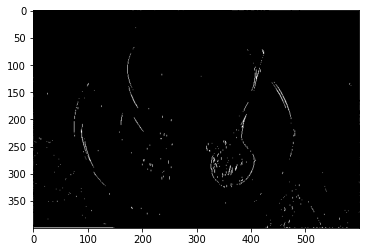

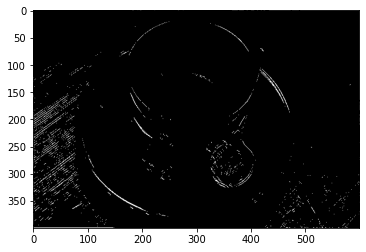

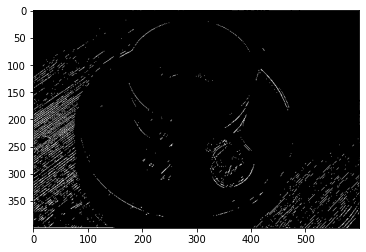

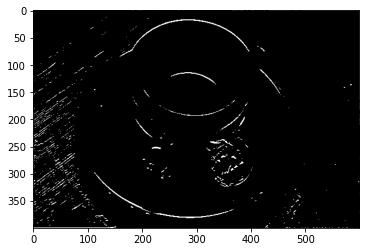

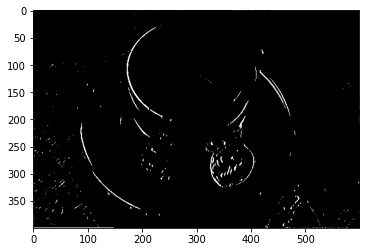

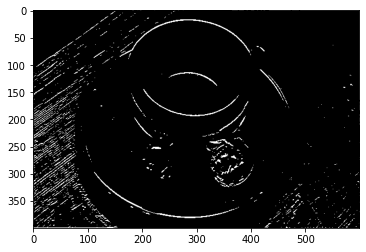

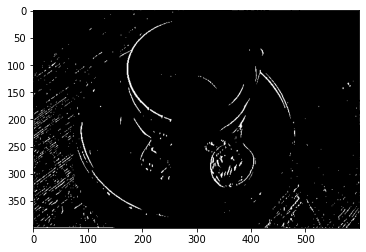

In [52]:
apply_masks_and_show(coffe, masks, threshold)

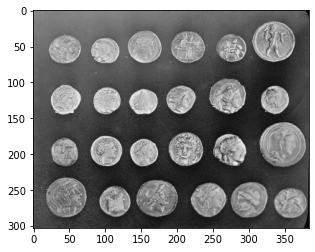

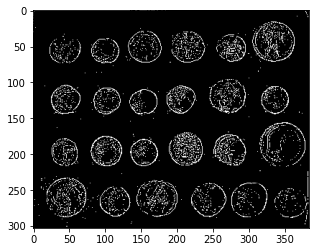

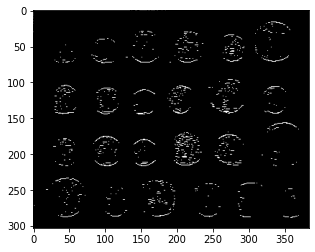

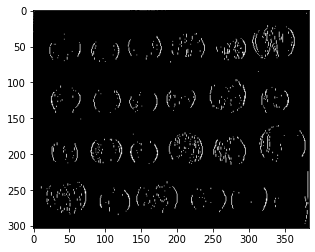

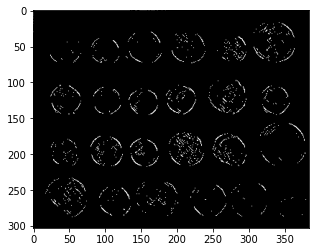

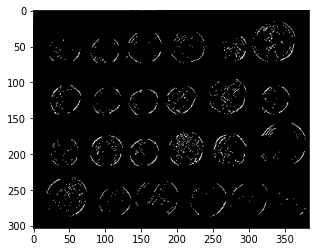

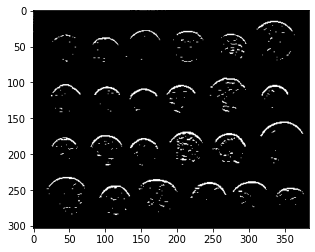

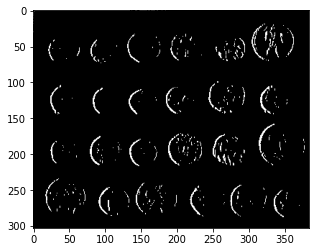

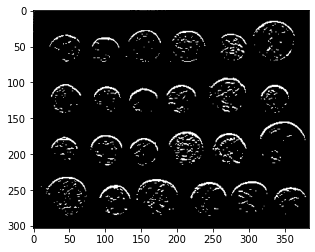

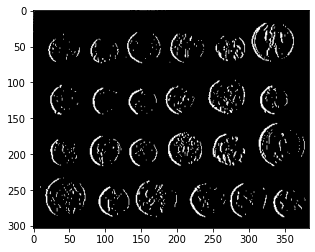

In [53]:
apply_masks_and_show(coins, masks, threshold)

---
## Ejercicio 6

Hasta ahora hemos aplicado las distintas máscaras y umbralizado de manera independiente. Ahora haz una función que, recibiendo la imagen, una lista de máscaras y un umbral, utilizando los distintos resultados obtenidos para la misma imagen con las máscaras y el umbral, unifique las imágenes obtenidas en una sola:

In [59]:
def compound_border_detection(image, masks, threshold):
    result = np.zeros(image.shape)
    for mask in masks:
        result += border_detection(image, mask, threshold)
    return result >= 1

---
## Ejercicio 7

Realiza la composición de las imágenes obtenidas en el ejercicio 5 utilizando la función del ejercicio 6 y muéstralas por pantalla:

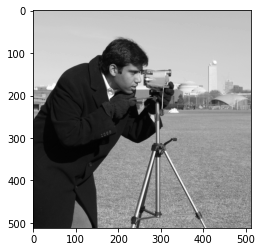

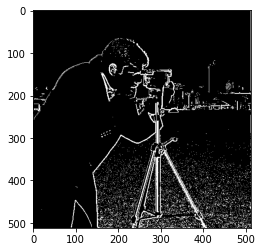

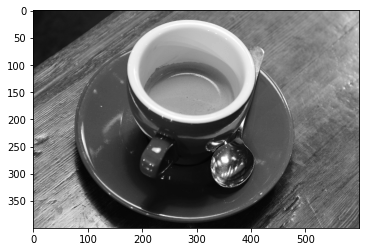

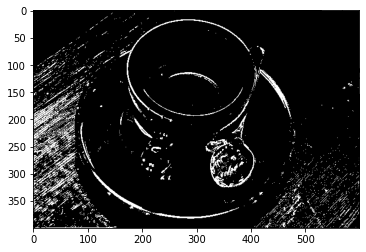

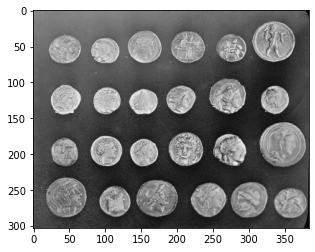

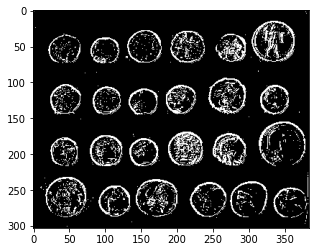

In [64]:
threshold = 0.6
plt.imshow(camera, cmap="gray")
plt.show()
plt.imshow(compound_border_detection(camera, masks, threshold), cmap="gray")
plt.show()
plt.imshow(coffe, cmap="gray")
plt.show()
plt.imshow(compound_border_detection(coffe, masks, threshold), cmap="gray")
plt.show()
plt.imshow(coins, cmap="gray")
plt.show()
plt.imshow(compound_border_detection(coins, masks, threshold), cmap="gray")
plt.show()